## Word2Vec SkipGram Algorithm Implementation

#### Import all important libraries

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE

#### Download the "text8.txt" data, if not available 

In [ ]:
#%%
#Downloading the data if not available
#!wget -qq https://s3.amazonaws.com/video.udacity-data.com/topher/2018/October/5bbe6499_text8/text8.zip

# Unzip the folder
#with zipfile.ZipFile("text8.zip","r") as zip_ref:
 #   zip_ref.extractall("C:/Users/saifu")


#### Open the file and read it

In [2]:
#reading the text data from the file
with open('C:/Users/saifu/text8') as f:    #open the content of the file 
    text8 = f.read()         # read it
    print("lenght of original dataset:{}".format(len(text8)) )

lenght of original dataset:100000000


#### Print the first 500 characters

In [3]:
#printing the first 500 characters
print("Some sample texts:" ,text8[:500])     #printing the first 500 characters

Some sample texts:  anarchism originated as a term of abuse first used against early working class radicals including the diggers of the english revolution and the sans culottes of the french revolution whilst the term is still used in a pejorative way to describe any act that used violent means to destroy the organization of society it has also been taken up as a positive label by self defined anarchists the word anarchism is derived from the greek without archons ruler chief king anarchism as a political philoso


####  Take only first 500 words for algorithm implementation

In [23]:
text= text8.lower().split()
text= text[0:500]    # taking only irst 500 words
print("\nlenght of dataset after slicing:{}".format(len(text)) )
text


lenght of dataset after slicing:500


['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against',
 'early',
 'working',
 'class',
 'radicals',
 'including',
 'the',
 'diggers',
 'of',
 'the',
 'english',
 'revolution',
 'and',
 'the',
 'sans',
 'culottes',
 'of',
 'the',
 'french',
 'revolution',
 'whilst',
 'the',
 'term',
 'is',
 'still',
 'used',
 'in',
 'a',
 'pejorative',
 'way',
 'to',
 'describe',
 'any',
 'act',
 'that',
 'used',
 'violent',
 'means',
 'to',
 'destroy',
 'the',
 'organization',
 'of',
 'society',
 'it',
 'has',
 'also',
 'been',
 'taken',
 'up',
 'as',
 'a',
 'positive',
 'label',
 'by',
 'self',
 'defined',
 'anarchists',
 'the',
 'word',
 'anarchism',
 'is',
 'derived',
 'from',
 'the',
 'greek',
 'without',
 'archons',
 'ruler',
 'chief',
 'king',
 'anarchism',
 'as',
 'a',
 'political',
 'philosophy',
 'is',
 'the',
 'belief',
 'that',
 'rulers',
 'are',
 'unnecessary',
 'and',
 'should',
 'be',
 'abolished',
 'although',
 'there',
 'are',
 'differing',
 '

In [28]:
vocab = set(text)   #   {'plow', 'his', 'wind', 'silver', '}

vocab_size = len(vocab)  
print('vocab_size:', vocab_size)
print("vocab :",vocab)

vocab_size: 276
vocab : {'movements', 'political', 'repeatedly', 'has', 'but', 'violent', 'forerunners', 'visions', 'libertarian', 'leader', 'authoritarian', 'decreed', 'positive', 'free', 'l', 'omnipotence', 'advocate', 'pejorative', 'association', 'resources', 'should', 'by', 'philosophy', 'attitudes', 'found', 'voyages', 'working', 'related', 'all', 'good', 'before', 'on', 'division', 'at', 'anarchist', 'particularly', 'were', 'guided', 'arrive', 'prisons', 'organization', 'equal', 'does', 'other', 'accumulated', 'regarded', 'defined', 'his', 'revolution', 'anarchy', 'aid', 'indigenous', 'about', 'voluntary', 'and', 'king', 'history', 'gatherer', 'principles', 'was', 'a', 'western', 'laws', 'access', 'against', 'whilst', 'culottes', 'from', 'relations', 'predecessors', 'de', 'godwin', 'dans', 'organized', 'sometimes', 'chief', 'mutual', 'governance', 'sovereignty', 'being', 'might', 'upon', 'had', 'moral', 'something', 'they', 'wealth', 'where', 'be', 'believe', 'refers', 'moment', 

#### Building word2index  dictionary

In [32]:
word2index = {w: i for i, w in enumerate(vocab)}
# type(word2index) --> dictionary
word2index

{'movements': 0,
 'political': 1,
 'repeatedly': 2,
 'has': 3,
 'but': 4,
 'violent': 5,
 'forerunners': 6,
 'visions': 7,
 'libertarian': 8,
 'leader': 9,
 'authoritarian': 10,
 'decreed': 11,
 'positive': 12,
 'free': 13,
 'l': 14,
 'omnipotence': 15,
 'advocate': 16,
 'pejorative': 17,
 'association': 18,
 'resources': 19,
 'should': 20,
 'by': 21,
 'philosophy': 22,
 'attitudes': 23,
 'found': 24,
 'voyages': 25,
 'working': 26,
 'related': 27,
 'all': 28,
 'good': 29,
 'before': 30,
 'on': 31,
 'division': 32,
 'at': 33,
 'anarchist': 34,
 'particularly': 35,
 'were': 36,
 'guided': 37,
 'arrive': 38,
 'prisons': 39,
 'organization': 40,
 'equal': 41,
 'does': 42,
 'other': 43,
 'accumulated': 44,
 'regarded': 45,
 'defined': 46,
 'his': 47,
 'revolution': 48,
 'anarchy': 49,
 'aid': 50,
 'indigenous': 51,
 'about': 52,
 'voluntary': 53,
 'and': 54,
 'king': 55,
 'history': 56,
 'gatherer': 57,
 'principles': 58,
 'was': 59,
 'a': 60,
 'western': 61,
 'laws': 62,
 'access': 63,
 '

#### Building index2word dictionary

In [7]:
index2word = {i: w for i, w in enumerate(vocab)}
index2word

{0: 'movements',
 1: 'political',
 2: 'repeatedly',
 3: 'has',
 4: 'but',
 5: 'violent',
 6: 'forerunners',
 7: 'visions',
 8: 'libertarian',
 9: 'leader',
 10: 'authoritarian',
 11: 'decreed',
 12: 'positive',
 13: 'free',
 14: 'l',
 15: 'omnipotence',
 16: 'advocate',
 17: 'pejorative',
 18: 'association',
 19: 'resources',
 20: 'should',
 21: 'by',
 22: 'philosophy',
 23: 'attitudes',
 24: 'found',
 25: 'voyages',
 26: 'working',
 27: 'related',
 28: 'all',
 29: 'good',
 30: 'before',
 31: 'on',
 32: 'division',
 33: 'at',
 34: 'anarchist',
 35: 'particularly',
 36: 'were',
 37: 'guided',
 38: 'arrive',
 39: 'prisons',
 40: 'organization',
 41: 'equal',
 42: 'does',
 43: 'other',
 44: 'accumulated',
 45: 'regarded',
 46: 'defined',
 47: 'his',
 48: 'revolution',
 49: 'anarchy',
 50: 'aid',
 51: 'indigenous',
 52: 'about',
 53: 'voluntary',
 54: 'and',
 55: 'king',
 56: 'history',
 57: 'gatherer',
 58: 'principles',
 59: 'was',
 60: 'a',
 61: 'western',
 62: 'laws',
 63: 'access',
 6

In [8]:
sentences= text
vocab2id= word2index
Window_Size=3
embed_dim=70

def make_dataset(sentences, vocab2id, window_size):
    data = list()

    ids = [vocab2id[vocab] for vocab in sentences]
    for i in range(len(ids)):
      
            X = ids[i]
            random_window = torch.LongTensor(1).random_(1, window_size+1).item()
            for j in range(max(i-random_window, 0), min(i+1+random_window, len(sentences))):
                if j != i:
                    y = ids[j]
                    data.append((X, y))

    return DataLoader(data, pin_memory=True, num_workers=0)
    
train_dataset = make_dataset( sentences, vocab2id, window_size=Window_Size)
train_dataset

In [9]:
print("text[:10]")
print(text[:10])

text[:10]
['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']


In [11]:
class SkipGram(nn.Module):
    def __init__(self, vocab_dim, embed_dim):
        super(SkipGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_dim, embed_dim)
        self.linear = nn.Linear(embed_dim, vocab_dim)
    
    def forward(self, inputs):
        embeds = self.embeddings(inputs)
        outs = self.linear(embeds)
        log_probs = F.log_softmax(outs)
        return log_probs

In [12]:
model = SkipGram(vocab_size, embed_dim)
model

SkipGram(
  (embeddings): Embedding(276, 70)
  (linear): Linear(in_features=70, out_features=276, bias=True)
)

#### Start training 

In [13]:
loss_list=[]
        
def train(training_data, num_epochs=30, learning_rate=0.025):
    
    device = torch.device('cuda:0')
    model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    loss_function = nn.NLLLoss()
    
    # start training
    for epoch in range(num_epochs):
        total_loss=0.0
        for (X, y) in training_data:  # X.shape=torch.Size([1]) ,  y.shape= torch.Size([1])
            
            if X.nelement() != 0:
                X, y = X.to(device), y.to(device)
                optimizer.zero_grad()
                output = model.forward(X)  # output.shape = torch.Size([1, 276])
                loss = loss_function(output,y)
                loss.backward()
                optimizer.step()
                total_loss+= loss
              
        print('epoch : {}, Loss : {:.3f}'.format(epoch+1, total_loss.item()))
        loss_list.append(total_loss)
    print("Training finished")
                
train(train_dataset)

C:\Users\saifu\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


epoch : 1, Loss : 11600.633
epoch : 2, Loss : 9580.819
epoch : 3, Loss : 8588.569
epoch : 4, Loss : 7999.547
epoch : 5, Loss : 7621.986
epoch : 6, Loss : 7365.854
epoch : 7, Loss : 7182.505
epoch : 8, Loss : 7044.859
epoch : 9, Loss : 6937.461
epoch : 10, Loss : 6851.329
epoch : 11, Loss : 6780.878
epoch : 12, Loss : 6722.348
epoch : 13, Loss : 6673.078
epoch : 14, Loss : 6631.139
epoch : 15, Loss : 6595.072
epoch : 16, Loss : 6563.747
epoch : 17, Loss : 6536.257
epoch : 18, Loss : 6511.896
epoch : 19, Loss : 6490.109
epoch : 20, Loss : 6470.427
epoch : 21, Loss : 6452.517
epoch : 22, Loss : 6436.066
epoch : 23, Loss : 6420.852
epoch : 24, Loss : 6406.664
epoch : 25, Loss : 6393.370
epoch : 26, Loss : 6380.843
epoch : 27, Loss : 6368.971
epoch : 28, Loss : 6357.667
epoch : 29, Loss : 6346.882
epoch : 30, Loss : 6336.543
Training finished


#### Plot the losses

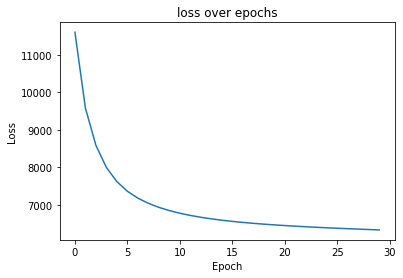

In [15]:
plt.figure()
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('loss over epochs')
plt.savefig('loss_over_epochs_skipgram.png')
plt.show()

#### Cosine Similarity

In [16]:
#  Cosine Similarity

def word_cosine(model, target, vocab_set, vocab2id):
    model.to('cpu')
    target_embed = model.embeddings(torch.LongTensor([[vocab2id[target]]]))
    target_similar = dict()

    for vocab in vocab_set:
        if vocab != target:
            vocab_embed = model.embeddings(torch.LongTensor([vocab2id[vocab]]))
            similarity = F.cosine_similarity(target_embed.squeeze(dim=0), vocab_embed).item()
            if len(target_similar) < 15:
                target_similar[round(similarity, 6)] = vocab
            elif min(target_similar.keys()) < similarity:
                del target_similar[min(target_similar.keys())]
                target_similar[round(similarity, 6)] = vocab
    
    return sorted(target_similar.items(), reverse=False)    
    

#### Euclidean Distance

In [17]:
#Euclidean Distance

def word_euclidean(model, target, vocab_set, vocab2id):
    model.to('cpu')
    target_embed = model.embeddings(torch.LongTensor([[vocab2id[target]]]))
    target_similar = dict()

    for vocab in vocab_set:
        if vocab != target:
            vocab_embed = model.embeddings(torch.LongTensor([[vocab2id[vocab]]]))
            similarity = torch.dist(target_embed, vocab_embed, 2).item()
            if len(target_similar) < 15:
                target_similar[round(similarity, 6)] = vocab
            elif min(target_similar.keys()) > similarity:
                del target_similar[min(target_similar.keys())]
                target_similar[round(similarity, 6)] = vocab
    
    return sorted(target_similar.items(), reverse=False)

#### Check a word to find its closest words in the vocabulary

In [18]:
C = 3  # window size
target = 'believe'   
target in vocab    


True

In [19]:
cos=word_cosine(model, target, vocab, word2index)
eucld= word_euclidean(model,target, vocab, word2index)
print('Embed dim : {}'.format(embed_dim))

Embed dim : 70


In [20]:
print('\nCosine Similarity')
for i, (score, vocab) in enumerate(cos):
    print('Top {} word : {}    score : {}'.format(i+1, vocab, score))


Cosine Similarity
Top 1 word : three    score : 0.183122
Top 2 word : holy    score : 0.183431
Top 3 word : political    score : 0.191208
Top 4 word : on    score : 0.191306
Top 5 word : as    score : 0.194475
Top 6 word : structures    score : 0.195038
Top 7 word : communistic    score : 0.196278
Top 8 word : work    score : 0.20042
Top 9 word : autonomous    score : 0.220553
Top 10 word : term    score : 0.225278
Top 11 word : should    score : 0.226986
Top 12 word : century    score : 0.27924
Top 13 word : prisons    score : 0.281
Top 14 word : access    score : 0.288536
Top 15 word : being    score : 0.310584


In [21]:
print('\nEuclidean Distance')
for i, (score, vocab) in enumerate(eucld):
    print('Top {} word : {}    score : {}'.format(i+1, vocab, score))


Euclidean Distance
Top 1 word : century    score : 9.692302
Top 2 word : libertarian    score : 10.842135
Top 3 word : l    score : 11.021466
Top 4 word : authoritarian    score : 11.047338
Top 5 word : leader    score : 11.325861
Top 6 word : repeatedly    score : 11.507755
Top 7 word : but    score : 11.573565
Top 8 word : free    score : 11.5957
Top 9 word : decreed    score : 11.635324
Top 10 word : forerunners    score : 11.823364
Top 11 word : movements    score : 11.832675
Top 12 word : visions    score : 12.121822
Top 13 word : violent    score : 12.335251
Top 14 word : positive    score : 12.697376
Top 15 word : has    score : 12.72747


#### visulaize the words

IndexError: index 276 is out of bounds for axis 0 with size 276

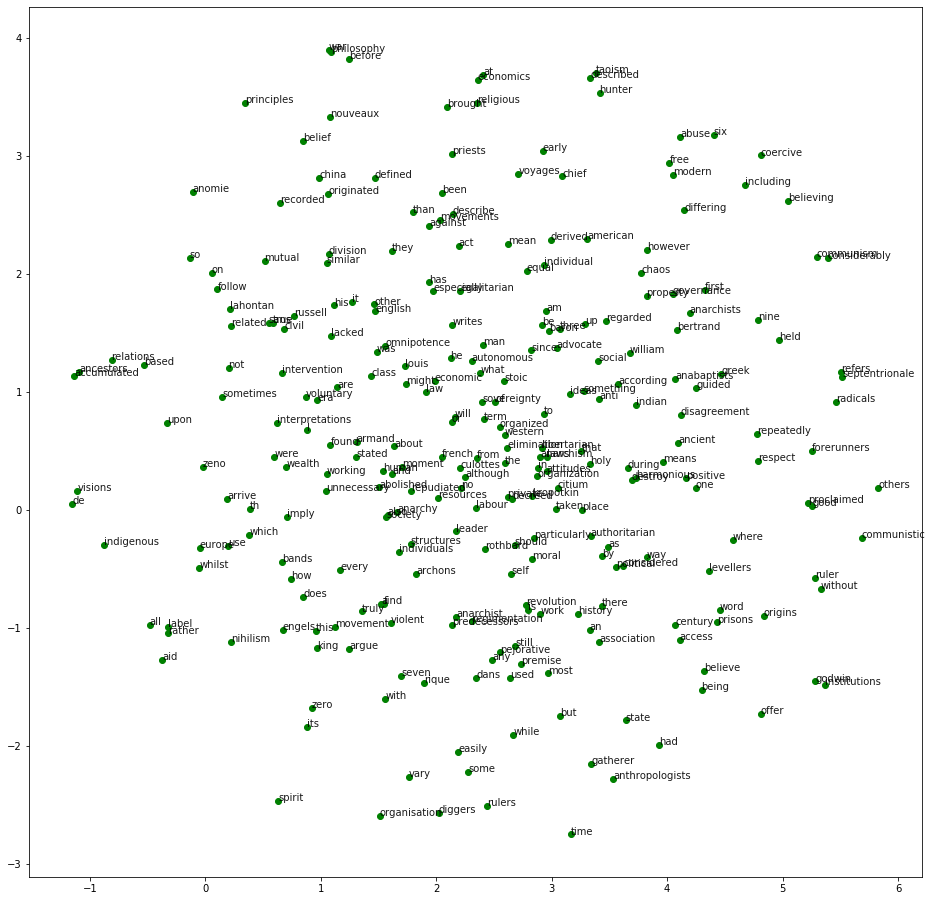

In [22]:
#%%
# visulaize the words
embeddings = model.embeddings.weight.to('cpu').data.numpy()
viz_words = 600
tsne = TSNE()
#I want to visualize first 600 words 
embed_tsne = tsne.fit_transform(embeddings[: viz_words, :])
fig, ax = plt.subplots(figsize=(16, 16))

for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], c='g')
    plt.annotate(index2word[idx], (embed_tsne[idx,0], embed_tsne[idx, 1]), alpha=0.9)
